#Chargement des données

In [46]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [47]:
url_ratings="/content/ratings_fact.csv"
url_movies="/content/table_movies.csv"
url_user="/content/table_Utilisateur.csv"

In [48]:
ratings=pd.read_csv(url_ratings)
movies=pd.read_csv(url_movies)
user=pd.read_csv(url_user)

In [49]:
ratings

,userId,movieId,rating,timestamp
0,86396,4911,3,2006-06-23 12:50:35
1,133475,4085,1,2008-08-21 16:27:05
2,108287,7156,4,2013-09-03 19:20:00
3,40195,48322,2,2007-02-20 14:49:28
4,37256,6297,4,2018-07-31 02:41:58
...,...,...,...,...
3200015,168782,8464,3,2005-04-06 19:25:46
3200016,146077,5139,0,2007-05-14 23:09:34
3200017,100887,224264,3,2023-05-06 22:39:52
3200018,145266,40617,3,2017-05-14 21:22:05


In [50]:
movies

,movieId,title,genres
0,5052,Time of Favor (Ha-Hesder) (2000),Drama|War
1,242112,The New Frontier (1935),Western
2,164566,Cemento Armato (2007),Thriller
3,33585,9 Songs (2004),Drama|Romance
4,213081,Cotton Candy (1978),Comedy
...,...,...,...
8753,6383,"2 Fast 2 Furious (Fast and the Furious 2, The)...",Action|Crime|Thriller
8754,189071,The Tale (2018),Drama
8755,254506,"Hiroshima Nagasaki August, 1945 (1970)",Documentary|War
8756,879,"Relic, The (1997)",Horror|Thriller


In [51]:
# Renommer une colonne
user = user.rename(columns={"title": "list of viewed titles"})

In [52]:
user

,userId,list of viewed titles
0,1,"['Patton (1970)', 'Crying Game, The (1992)']"
1,3,"['Batman Returns (1992)', 'Armageddon (1998)',..."
2,5,['Waterworld (1995)']
3,6,['Lara Croft: Tomb Raider (2001)']
4,7,['Die Hard: With a Vengeance (1995)']
...,...,...
114775,200943,"['Marathon Man (1976)', 'Star Wars: Episode I ..."
114776,200944,"['Beowulf (2007)', 'Million Dollar Baby (2004)']"
114777,200945,"['Gifted (2017)', 'Crying Game, The (1992)']"
114778,200947,['Inception (2010)']


#Reponses aux questions

In [53]:
# Conversion des genres en liste
movies['genres'] = movies['genres'].str.split('|')


In [54]:
movies

,movieId,title,genres
0,5052,Time of Favor (Ha-Hesder) (2000),"[Drama, War]"
1,242112,The New Frontier (1935),[Western]
2,164566,Cemento Armato (2007),[Thriller]
3,33585,9 Songs (2004),"[Drama, Romance]"
4,213081,Cotton Candy (1978),[Comedy]
...,...,...,...
8753,6383,"2 Fast 2 Furious (Fast and the Furious 2, The)...","[Action, Crime, Thriller]"
8754,189071,The Tale (2018),[Drama]
8755,254506,"Hiroshima Nagasaki August, 1945 (1970)","[Documentary, War]"
8756,879,"Relic, The (1997)","[Horror, Thriller]"


In [55]:
# Fusion de `ratings` avec `movies`
data = pd.merge(ratings, movies, on="movieId", how="inner")


In [56]:
data

,userId,movieId,rating,timestamp,title,genres
0,133236,1240,4,2017-02-12 15:51:30,"Terminator, The (1984)","[Action, Sci-Fi, Thriller]"
1,183219,140174,5,2021-02-14 18:43:55,Room (2015),[Drama]
2,149399,165,3,1996-06-15 10:39:25,Die Hard: With a Vengeance (1995),"[Action, Crime, Thriller]"
3,151719,1089,3,2005-01-26 13:20:32,Reservoir Dogs (1992),"[Crime, Mystery, Thriller]"
4,196009,4914,3,2008-05-22 12:52:43,Breathless (À bout de souffle) (1960),"[Crime, Drama, Romance]"
...,...,...,...,...,...,...
339122,134437,4239,5,2008-11-10 02:36:36,Blow (2001),"[Crime, Drama]"
339123,58093,6703,2,2003-09-12 02:25:54,"Order, The (2003)","[Horror, Mystery, Thriller]"
339124,65991,345,3,1996-09-11 14:46:45,"Adventures of Priscilla, Queen of the Desert, ...","[Comedy, Drama]"
339125,60153,1333,2,2003-06-03 03:38:21,"Birds, The (1963)","[Horror, Thriller]"


###  Construction des profils utilisateur

* Créer un vecteur pour chaque film basé sur ses genres

In [57]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(movies['genres']), columns=mlb.classes_, index=movies.index)
movies = pd.concat([movies, genres_encoded], axis=1)


In [58]:
movies

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,5052,Time of Favor (Ha-Hesder) (2000),"[Drama, War]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,242112,The New Frontier (1935),[Western],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,164566,Cemento Armato (2007),[Thriller],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,33585,9 Songs (2004),"[Drama, Romance]",0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,213081,Cotton Candy (1978),[Comedy],0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8753,6383,"2 Fast 2 Furious (Fast and the Furious 2, The)...","[Action, Crime, Thriller]",0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8754,189071,The Tale (2018),[Drama],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8755,254506,"Hiroshima Nagasaki August, 1945 (1970)","[Documentary, War]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8756,879,"Relic, The (1997)","[Horror, Thriller]",0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


* Combiner les vecteurs de genres avec les évaluations

In [60]:
data = pd.merge(ratings, movies, on="movieId", how="inner")


In [61]:
data

,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,133236,1240,4,2017-02-12 15:51:30,"Terminator, The (1984)","[Action, Sci-Fi, Thriller]",0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
1,183219,140174,5,2021-02-14 18:43:55,Room (2015),[Drama],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,149399,165,3,1996-06-15 10:39:25,Die Hard: With a Vengeance (1995),"[Action, Crime, Thriller]",0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,151719,1089,3,2005-01-26 13:20:32,Reservoir Dogs (1992),"[Crime, Mystery, Thriller]",0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,196009,4914,3,2008-05-22 12:52:43,Breathless (À bout de souffle) (1960),"[Crime, Drama, Romance]",0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339122,134437,4239,5,2008-11-10 02:36:36,Blow (2001),"[Crime, Drama]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
339123,58093,6703,2,2003-09-12 02:25:54,"Order, The (2003)","[Horror, Mystery, Thriller]",0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
339124,65991,345,3,1996-09-11 14:46:45,"Adventures of Priscilla, Queen of the Desert, ...","[Comedy, Drama]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
339125,60153,1333,2,2003-06-03 03:38:21,"Birds, The (1963)","[Horror, Thriller]",0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


* Calculer le profil utilisateur moyen (𝑃𝑢)

In [62]:
user_profiles = data.groupby('userId').apply(lambda x: (x.iloc[:, -len(mlb.classes_):].T * x['rating']).mean(axis=1))
user_profiles = user_profiles.reset_index().rename(columns={0: "profile_vector"})


<ipython-input-62-f5589ede27f4>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  user_profiles = data.groupby('userId').apply(lambda x: (x.iloc[:, -len(mlb.classes_):].T * x['rating']).mean(axis=1))


In [63]:
user_profiles

,userId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,4.50,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.00,2.5,0.0
1,3,0.0,2.666667,0.0,0.0,1.0,1.0,0.666667,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.00,0.0,0.0
2,5,0.0,3.000000,3.0,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.00,0.0,0.0
3,6,0.0,5.000000,5.0,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
4,7,0.0,3.000000,0.0,0.0,0.0,0.0,3.000000,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114775,200943,0.0,0.500000,0.5,0.0,0.0,0.5,0.750000,0.0,1.75,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.75,0.0,0.0
114776,200944,0.0,1.500000,1.5,1.5,0.0,0.0,0.000000,0.0,1.50,...,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.00,0.0,0.0
114777,200945,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,5.00,...,0.0,0.0,0.0,0.0,0.0,2.5,0.0,2.50,0.0,0.0
114778,200947,0.0,4.000000,0.0,0.0,0.0,0.0,4.000000,0.0,4.00,...,0.0,0.0,4.0,0.0,4.0,0.0,4.0,4.00,0.0,0.0


#Clustering et classification des nouveaux utilisateurs

* Comparer le vecteur utilisateur (
𝑃
𝑢) avec les vecteurs des films (
𝑉
𝑖
)

In [67]:
from sklearn.preprocessing import StandardScaler

# Exclure la colonne userId
user_profiles_data = user_profiles.drop(columns=['userId'])

# Normaliser les scores des genres
scaler = StandardScaler()
user_profiles_scaled = scaler.fit_transform(user_profiles_data)

# Vérifier les données après normalisation
print(user_profiles_scaled[:5])


[[-0.03282231 -0.83074411 -0.68728361 -0.34603517 -0.34554427 -0.83002858
  -0.48832395 -0.10253331  1.85273671 -0.3674136  -0.10911821 -0.30221124
  -0.35016378 -0.23907655 -0.4653185   1.0280272  -0.59463592  0.62542411
   3.33614508 -0.12816939]
 [-0.03282231  0.95370983 -0.68728361 -0.34603517  0.86939444 -0.1279597
   0.11562441 -0.10253331 -1.00193759  0.81733342 -0.10911821 -0.30221124
  -0.35016378 -0.23907655 -0.4653185   0.22278055  0.98763009 -0.07390461
  -0.27728117 -0.12816939]
 [-0.03282231  1.17676657  1.5924754  -0.34603517 -0.34554427 -0.83002858
  -0.48832395 -0.10253331 -1.00193759 -0.3674136  -0.10911821 -0.30221124
  -0.35016378 -0.23907655 -0.4653185  -0.5824661   1.77876309 -0.77323334
  -0.27728117 -0.12816939]
 [-0.03282231  2.51510703  3.11231474 -0.34603517 -0.34554427 -0.83002858
  -0.48832395 -0.10253331 -1.00193759 -0.3674136  -0.10911821 -0.30221124
  -0.35016378 -0.23907655 -0.4653185  -0.5824661  -0.59463592 -0.77323334
  -0.27728117 -0.12816939]
 [-0.

In [68]:
from sklearn.cluster import KMeans

# Appliquer K-means pour créer des groupes d'utilisateurs
kmeans = KMeans(n_clusters=3, random_state=42)  # Ajustez le nombre de clusters si nécessaire
user_profiles['cluster'] = kmeans.fit_predict(user_profiles_scaled)

# Afficher les résultats des clusters
print(user_profiles[['userId', 'cluster']].head())


   userId  cluster
0       1        1
1       3        0
2       5        0
3       6        0
4       7        0


* Analyse Pca

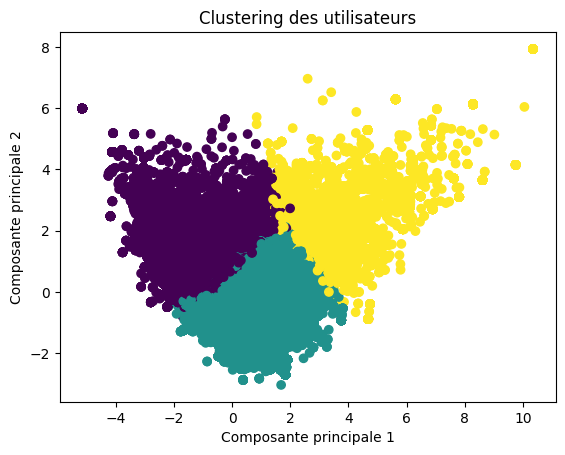

In [71]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Réduction de dimensionnalité avec PCA
pca = PCA(n_components=2)
user_profiles_pca = pca.fit_transform(user_profiles_scaled)

# Visualisation des clusters
plt.scatter(user_profiles_pca[:, 0], user_profiles_pca[:, 1], c=user_profiles['cluster'], cmap='viridis')
plt.title("Clustering des utilisateurs")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.show()


* Classification des nouveaux user

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Préparation des données
X = user_profiles_scaled  # Caractéristiques (features)
y = user_profiles['cluster']  # Cible (target)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entraîner le modèle Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = clf.predict(X_test)

# Évaluation du modèle
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Précision globale
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      9965
           1       0.99      0.99      0.99     22432
           2       1.00      0.97      0.98      2037

    accuracy                           0.99     34434
   macro avg       0.99      0.98      0.98     34434
weighted avg       0.99      0.99      0.99     34434

Précision du modèle : 0.99
